In [34]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
import seaborn as sns

# Playing with k-Armed Bandits

In this notebook, we will implement the algorithms presented in chapter 2 of Sutton's book and try to reproduce its figures.

## Bandits 

The following classes can be used to generate bandits:

In [3]:
class Bandit():
    # a one armed bandit that gives normally distributed rewards
    # with mean 'q_star' and variance 'scale'
    def __init__(self, q_star, scale):
        self.mean = q_star
        self.scale = scale
        
    def reward(self):
        return nprand.normal(self.mean, self.scale)

In [4]:
class kBandits():
    # a collection of k 1-armed bandits, normally distributed with
    # mean 'mean' and variance 'scale'
    def __init__(self, k, mean, scale):
        self.bandits = [Bandit(nprand.normal(mean, scale), 1) for i in range(0, k)]  

### Example

We create a 10-armed bandit:

In [20]:
K = kBandits(10, 0, 1)

and we generate rewards to plot a figure like Fig 4.1

In [23]:
# we add a slight jitter in x to our points, for a clearer plot
points = [[i+nprand.normal(0, 0.05), K.bandits[i].reward()] for i in range(0, 10) for k in range(0, 100)]

In [24]:
x = [p[0] for p in points]
y = [p[1] for p in points]

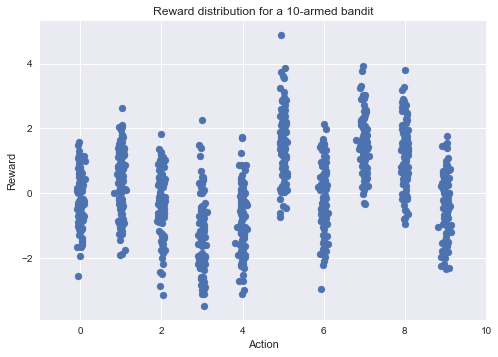

In [25]:
ax = plt.scatter(x, y)
plt.xlabel('Action')
plt.ylabel('Reward')
plt.title('Reward distribution for a 10-armed bandit')
plt.xlim([-1, 10])
plt.show()

## Exercise: implementing the first algorithm

To implement the first algorithm of the chapter, you'll need an argmax function that breaks ties randomly:

In [26]:
def randargmax(array):
    # your function here
    i=0
    indices=[]
    maximum = array[0]
    
    for element in array :
        if element == maximum:
            indices.append(i)
        if element > maximum:
            maximum = element
            indices=[i]
        i+=1
        
    if len(indices)>1:
        return nprand.choice(indices)
    else : 
        return indices[0]
            

Hint: take a look at `numpy.where` (`np.where`) and `numpy.random.choice` (`nprand.choice`)

You'll also need a function that decides wether the action should be to exploratory (random), with proba epsilon, or greedy

In [10]:
def choose_at_random(epsilon):
    # your function here
    # should return 1 if exploration, 0 otherwise
    return nprand.choice([0,1],p=[epsilon,1-epsilon])

You're ready to implement the first algorithm!

In [11]:
def simple_algo(steps, epsilon,kBandits):
    # your algorithm here
    # it should return an array of rewards, one per step   
    k = len(K.bandits)
    Q = [0 for i in range(0, k)]  
    N = [0 for i in range(0, k)]  
    reward=[]
    choice =0
    
    for t in range(0,steps):
        
        if choose_at_random(epsilon)==1:
            choice = nprand.choice(k)
        if choose_at_random(epsilon)==0:
            choice = randargmax(Q)
        
        R = kBandits.bandits[choice].reward()
        N[choice] = N[choice]+1
        Q[choice] = Q[choice]+(R-Q[choice])/N[choice]
        reward.append(R)
    
    return reward

### Figures

To reproduce Fig 2.2, the algorithm should be run 2000 times with 1000 steps, and the mean should be taken over the 2000 rewards per step. Such operations can be easily managed using `numpy` in the following way:

In [40]:
%%notify
n_episodes = 200
n_steps = 1000
epsilon = 0

# initiate an empty array of the desired shape
rewards = np.ndarray(shape=(n_episodes, n_steps))

# fill the array with the results of the algorithm
for i in range(0, np.size(rewards, 0)):
    R = simple_algo(n_steps, epsilon,K)
    # replace the ith row with the computed rewards
    rewards[i, :] = R
    
# then take the mean over the rows using array.mean
mean_reward = rewards.mean(axis=0)


##shouldn't it be over the columns ? 
mean_reward_2=rewards.mean(axis=1)

<IPython.core.display.Javascript object>

I'm not so sure about the mean calculation : since it is supposed to be taken over the 2000 rewards per step it makes more sens to me if we take it along the columns but maybe I'm wrong.... But anyway the algortihm still isn't behaving well

You can now plot the result and compare it to the book's figure

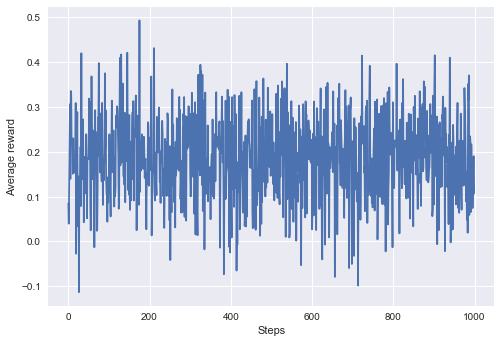

In [41]:
plt.plot(mean_reward)
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

The lower part of Fig. 2.2 shows the percentage of optimal actions chosen by the algorithm. Modify your `simple_algo` to keep track of optimal actions and try to reproduce the book's bottom figure.

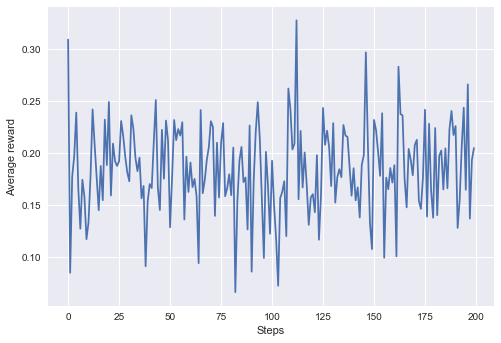

In [42]:
plt.plot(mean_reward_2)
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()